# 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [3]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [4]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 56.6 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-01 04:04:46--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=q2h%2B8i6fYc577z4iLIB7NZahrCM%3D

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset

/content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset


In [6]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 로드

In [ ]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game).txt')

In [ ]:
print(len(total_data))
total_data.head()

499643


,document,label
0,첫 독립영화 그리고 독립영화에 빠지다,1
1,횡령죄가 아니라 배임죄인것 중요합니다 참고로 예금에서 인출한것이 배임이 아니라 협력...,1
2,는 기억할것입니다 응다죽어,0
3,괜히 샀다 나도 모르는사이 틀딱 감성 다 사라졌네 ㅋㅋ 추억보정이 부족하다,0
4,재구매 부모님과 할머니 맛있게 드시라고 보내드렸습니다 부모님이 저번에 보내드린것이 ...,1


In [ ]:
total_data_10 = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_10.txt')

In [ ]:
print(len(total_data_10))
total_data_10.head()

490079


,document,label
0,뭔 재미인지 모르겠다,0
1,짱재밌고 추천해요그럼 잘보세요,1
2,허접한 스토리이해불가능한 퍼즐 이렇게 재미없는 게임은 처음본다,0
3,여러 해 째 먹고 있습니다 기침 날 때 한 스푼 씩 떠먹습니다 부모님께도 사드려서 ...,1
4,점도 아까운 영화 보고나면 기분이 더러워진다,0


In [ ]:
total_data_25 = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_25.txt')

In [ ]:
print(len(total_data_25))
total_data_25.head()

491673


,document,label
0,한번빨았더니 쫄티됐는데요,0
1,장르 선택 잘못됐다 이건 코미디물 연기도 참,0
2,프랑스 영화는 역시 너무 서정적이야 뭔가 파격이 필요할 텐데,1
3,찍힌거보냈네요 저부분은 배송중 찍힐수도 없는부분인데 의자마감상태도 그리 좋진않아요 ...,0
4,재구매 항상 이집에서만 구매해요 좋아요,1


In [ ]:
total_data_50 = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_50.txt')

In [ ]:
print(len(total_data_50))
total_data_50.head()

494330


,document,label
0,스텐보다는 묵직하지만 얼룩안생기고 이뻐요,1
1,일반적인 형태의 전략 시뮬레이션 게임을 좋아하신다면 재미있게 하실수 있습니다 다...,1
2,역대급 개꿀잼 하 시즌 나와라,1
3,그릇 디자인예쁘고 마음에 들어요 컵은 별로 필요없었지만 파스타 그릇 함께 구매하려고...,0
4,갑자기 왜 두개로 쪼게놓은건지 이해안가는부분 ㅇㅈ 어 ㅇㅈ,1


In [7]:
total_data_5X = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_5X.txt')

In [8]:
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [9]:
total_data_10X = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_10X.txt')

In [10]:
print(len(total_data_10X))
total_data_10X.head()

595286


,document,label
0,잘먹고 있어요 또 구입할게요,1
1,정말 접착력은 최고입니다,1
2,이건 좀 제 입맛에는 별로였어요,0
3,아니 왜 실행안되요,0
4,여러 사람이 동시에 접속하여 의사소통 할 수 있는 점이 가장 마음에 든다 특히 해외...,1


# 토큰화

In [11]:
# 불용어 파일 로드
import os
data =  open('sentiment_stopwords_v0.2.txt', 'r', encoding='utf-16')
stopwords = []
for line in data :
    line.rstrip()
    stopwords.append(line.replace("\t\n", ""))
print(len(stopwords))
print(stopwords)

772
['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를들면', '예를들자면', '저', '소인', '소생', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수없다', '해서는안된다', '뿐만아니라', '만이아니다', '만은아니다', '막론하고', '관계없이', '그치지않다', '그러나', '그런데', '하지만', '든간에', '논하지않다', '따지지않다', '설사', '비록', '더라도', '아니면', '만못하다', '하는편이낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이외에', '이밖에', '하여야', '비로소', '한다면몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할생각이다', '하려고하다', '이리하여', '그리하여', '그렇게함으로써', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '그렇지만', '이외에도', '대해말하자면', '다음에', '반대로', '반대로말하자면', '이와반대로', '바꾸어서말하면', '바꾸어서한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱

In [12]:
mecab = Mecab()

In [ ]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
X_total = []
for sentence in total_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total.append(temp_X)

In [ ]:
print(len(total_data))
total_data.head()

499643


,document,label
0,첫 독립영화 그리고 독립영화에 빠지다,1
1,횡령죄가 아니라 배임죄인것 중요합니다 참고로 예금에서 인출한것이 배임이 아니라 협력...,1
2,는 기억할것입니다 응다죽어,0
3,괜히 샀다 나도 모르는사이 틀딱 감성 다 사라졌네 ㅋㅋ 추억보정이 부족하다,0
4,재구매 부모님과 할머니 맛있게 드시라고 보내드렸습니다 부모님이 저번에 보내드린것이 ...,1


In [ ]:
X_total_10 = []
for sentence in total_data_10['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_10.append(temp_X)
print(len(total_data_10))
total_data_10.head()

490079


,document,label
0,뭔 재미인지 모르겠다,0
1,짱재밌고 추천해요그럼 잘보세요,1
2,허접한 스토리이해불가능한 퍼즐 이렇게 재미없는 게임은 처음본다,0
3,여러 해 째 먹고 있습니다 기침 날 때 한 스푼 씩 떠먹습니다 부모님께도 사드려서 ...,1
4,점도 아까운 영화 보고나면 기분이 더러워진다,0


In [ ]:
X_total_25 = []
for sentence in total_data_25['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_25.append(temp_X)
print(len(total_data_25))
total_data_25.head()

491673


,document,label
0,한번빨았더니 쫄티됐는데요,0
1,장르 선택 잘못됐다 이건 코미디물 연기도 참,0
2,프랑스 영화는 역시 너무 서정적이야 뭔가 파격이 필요할 텐데,1
3,찍힌거보냈네요 저부분은 배송중 찍힐수도 없는부분인데 의자마감상태도 그리 좋진않아요 ...,0
4,재구매 항상 이집에서만 구매해요 좋아요,1


In [ ]:
X_total_50 = []
for sentence in total_data_50['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_50.append(temp_X)
print(len(total_data_50))
total_data_50.head()

494330


,document,label
0,스텐보다는 묵직하지만 얼룩안생기고 이뻐요,1
1,일반적인 형태의 전략 시뮬레이션 게임을 좋아하신다면 재미있게 하실수 있습니다 다...,1
2,역대급 개꿀잼 하 시즌 나와라,1
3,그릇 디자인예쁘고 마음에 들어요 컵은 별로 필요없었지만 파스타 그릇 함께 구매하려고...,0
4,갑자기 왜 두개로 쪼게놓은건지 이해안가는부분 ㅇㅈ 어 ㅇㅈ,1


In [13]:
X_total_5X = []
for sentence in total_data_5X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_5X.append(temp_X)
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [14]:
X_total_10X = []
for sentence in total_data_10X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_10X.append(temp_X)
print(len(total_data_10X))
total_data_10X.head()

595286


,document,label
0,잘먹고 있어요 또 구입할게요,1
1,정말 접착력은 최고입니다,1
2,이건 좀 제 입맛에는 별로였어요,0
3,아니 왜 실행안되요,0
4,여러 사람이 동시에 접속하여 의사소통 할 수 있는 점이 가장 마음에 든다 특히 해외...,1


# 정수 인코딩

In [ ]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [ ]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 16
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 90000
등장 빈도가 15번 이하인 희귀 단어의 수: 74275
단어 집합에서 희귀 단어의 비율: 82.52777777777777
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.813377242090743


In [ ]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 15726


In [ ]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
y_total = np.array(total_data['label'])

In [ ]:
tokenizer_10 = Tokenizer()
tokenizer_10.fit_on_texts(X_total_10)
tokenizer_10 = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_10.fit_on_texts(X_total_10)
X_total_10 = tokenizer_10.texts_to_sequences(X_total_10)
y_total_10 = np.array(total_data_10['label'])

In [ ]:
tokenizer_25 = Tokenizer()
tokenizer_25.fit_on_texts(X_total_25)
tokenizer_25 = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_25.fit_on_texts(X_total_25)
X_total_25 = tokenizer_25.texts_to_sequences(X_total_25)
y_total_25 = np.array(total_data_25['label'])

In [ ]:
tokenizer_50 = Tokenizer()
tokenizer_50.fit_on_texts(X_total_50)
tokenizer_50 = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_50.fit_on_texts(X_total_50)
X_total_50 = tokenizer_50.texts_to_sequences(X_total_50)
y_total_50 = np.array(total_data_50['label'])

In [15]:
vocab_size=15726

In [16]:
tokenizer_5X = Tokenizer()
tokenizer_5X.fit_on_texts(X_total_5X)
tokenizer_5X = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_5X.fit_on_texts(X_total_5X)
X_total_5X = tokenizer_5X.texts_to_sequences(X_total_5X)
y_total_5X = np.array(total_data_5X['label'])

In [17]:
tokenizer_10X = Tokenizer()
tokenizer_10X.fit_on_texts(X_total_10X)
tokenizer_10X = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_10X.fit_on_texts(X_total_10X)
X_total_10X = tokenizer_10X.texts_to_sequences(X_total_10X)
y_total_10X = np.array(total_data_10X['label'])

# 빈 샘플(empty samples)제거

In [ ]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

[111, 326, 488, 950, 1488, 2119, 2743, 2944, 3016, 3207, 3317, 3830, 4080, 4478, 4489, 4522, 5390, 7301, 7471, 7661, 7695, 7916, 8081, 8290, 8315, 8638, 8783, 9062, 9112, 9650, 9767, 10158, 10880, 10896, 11317, 12004, 13485, 13711, 13979, 14076, 14531, 15085, 15135, 16166, 16489, 16720, 16893, 16912, 17041, 17398, 17524, 17778, 17950, 18123, 18538, 19803, 20056, 20572, 21458, 21479, 21534, 21708, 22116, 22231, 22329, 22894, 23129, 23137, 23155, 23340, 23573, 23909, 24183, 24193, 24209, 24361, 24999, 25356, 25935, 26160, 26487, 26891, 27127, 27524, 28778, 29917, 30250, 30581, 30618, 31658, 31807, 32120, 32286, 32365, 32988, 33156, 34127, 34128, 34211, 34268, 34536, 34722, 35216, 35352, 35532, 35679, 36284, 36822, 37229, 37972, 38311, 38988, 39090, 39932, 39974, 40056, 40498, 40574, 40671, 41558, 41736, 41758, 42910, 43238, 43630, 43857, 44243, 44347, 44779, 45001, 45312, 46603, 46838, 47132, 47715, 49518, 49863, 49985, 50013, 50077, 50083, 50135, 50860, 50911, 51468, 51776, 51845, 52515

In [ ]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

498254
498254


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_10 = [index for index, sentence in enumerate(X_total_10) if len(sentence) < 1]
X_total_10 = np.delete(X_total_10, drop_total_10, axis=0)
y_total_10 = np.delete(y_total_10, drop_total_10, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_25 = [index for index, sentence in enumerate(X_total_25) if len(sentence) < 1]
X_total_25 = np.delete(X_total_25, drop_total_25, axis=0)
y_total_25 = np.delete(y_total_25, drop_total_25, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_50 = [index for index, sentence in enumerate(X_total_50) if len(sentence) < 1]
X_total_50 = np.delete(X_total_50, drop_total_50, axis=0)
y_total_50 = np.delete(y_total_50, drop_total_50, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [18]:
drop_total_5X = [index for index, sentence in enumerate(X_total_5X) if len(sentence) < 1]
X_total_5X = np.delete(X_total_5X, drop_total_5X, axis=0)
y_total_5X = np.delete(y_total_5X, drop_total_5X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [19]:
drop_total_10X = [index for index, sentence in enumerate(X_total_10X) if len(sentence) < 1]
X_total_10X = np.delete(X_total_10X, drop_total_10X, axis=0)
y_total_10X = np.delete(y_total_10X, drop_total_10X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 82
리뷰의 평균 길이 : 9.204496100382535


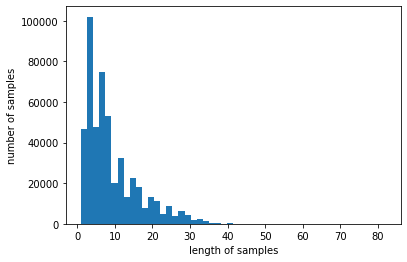

In [ ]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [20]:
max_len = 25

In [ ]:
# 길이별 비율 체크
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 95.70560396905996


In [ ]:
# 짧은 데이터는 0을 채우고, 최적길이를 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

In [ ]:
X_total_10 = pad_sequences(X_total_10, maxlen = max_len)
X_total_25 = pad_sequences(X_total_25, maxlen = max_len)
X_total_50 = pad_sequences(X_total_50, maxlen = max_len)

In [21]:
X_total_5X = pad_sequences(X_total_5X, maxlen = max_len)
X_total_10X = pad_sequences(X_total_10X, maxlen = max_len)

# 모델 훈련

In [22]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf
ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
RECALL = tf.keras.metrics.Recall()
PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [24]:
model_GRU = Sequential()
model_GRU.add(Embedding(vocab_size+2, 100))
model_GRU.add(GRU(128))
model_GRU.add(Dense(1, activation='sigmoid'))

In [25]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, PRECISION, RECALL, TP, TN, FP, FN])

In [ ]:
# 모델 훈련
mc_GRU = ModelCheckpoint('7_RNN_GRU_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_GRU.fit(X_total, y_total, epochs=15, callbacks=[es, mc_GRU], batch_size=100, validation_split=0.2)

Epoch 1/15
3987/3987 [==============================] - 74s 17ms/step - loss: 0.4062 - acc: 0.8134 - auc: 0.8965 - auc_1: 0.8958 - precision: 0.8177 - recall: 0.8111 - true_positives: 163131.0000 - true_negatives: 161098.0000 - false_positives: 36374.0000 - false_negatives: 38000.0000 - val_loss: 0.3972 - val_acc: 0.8221 - val_auc: 0.9070 - val_auc_1: 0.9057 - val_precision: 0.8656 - val_recall: 0.7646 - val_true_positives: 38277.0000 - val_true_negatives: 43644.0000 - val_false_positives: 5945.0000 - val_false_negatives: 11785.0000

Epoch 00001: val_acc improved from -inf to 0.82208, saving model to RNN_GRU_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3987/3987 [==============================] - 67s 17ms/step - loss: 0.3687 - acc: 0.8363 - auc: 0.9158 - auc_1: 0.9153 - precision: 0.8409 - recall: 0.8332 - true_positives: 167591.0000 - true_negatives: 165766.0000 - false_positives: 31706.0000 - false_negatives: 33540.0000 - val_loss: 0.3764 - val_acc: 0.8317 - val

In [ ]:
mc_GRU10 = ModelCheckpoint('RNN_GRU10_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_GRU.fit(X_total_10, y_total_10, epochs=15, callbacks=[es, mc_GRU10], batch_size=100, validation_split=0.2)

Epoch 1/15
3910/3910 [==============================] - 62s 16ms/step - loss: 0.4325 - acc: 0.7940 - auc: 0.8808 - auc_1: 0.8801 - precision: 0.7989 - recall: 0.7864 - true_positives: 153883.0000 - true_negatives: 156519.0000 - false_positives: 38747.0000 - false_negatives: 41803.0000 - val_loss: 0.3858 - val_acc: 0.8269 - val_auc: 0.9079 - val_auc_1: 0.9065 - val_precision: 0.8348 - val_recall: 0.8144 - val_true_positives: 39735.0000 - val_true_negatives: 41081.0000 - val_false_positives: 7866.0000 - val_false_negatives: 9056.0000

Epoch 00001: val_acc improved from -inf to 0.82686, saving model to RNN_GRU10_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3910/3910 [==============================] - 63s 16ms/step - loss: 0.3678 - acc: 0.8354 - auc: 0.9161 - auc_1: 0.9140 - precision: 0.8373 - recall: 0.8331 - true_positives: 163018.0000 - true_negatives: 163594.0000 - false_positives: 31672.0000 - false_negatives: 32668.0000 - val_loss: 0.3730 - val_acc: 0.8332 - va

In [ ]:
mc_GRU25 = ModelCheckpoint('RNN_GRU25_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_GRU.fit(X_total_25, y_total_25, epochs=15, callbacks=[es, mc_GRU25], batch_size=100, validation_split=0.2)

Epoch 1/15
3923/3923 [==============================] - 64s 16ms/step - loss: 0.4457 - acc: 0.7851 - auc: 0.8723 - auc_1: 0.8732 - precision: 0.7915 - recall: 0.7749 - true_positives: 152156.0000 - true_negatives: 155779.0000 - false_positives: 40084.0000 - false_negatives: 44208.0000 - val_loss: 0.4006 - val_acc: 0.8168 - val_auc: 0.9053 - val_auc_1: 0.9042 - val_precision: 0.7837 - val_recall: 0.8774 - val_true_positives: 43205.0000 - val_true_negatives: 36888.0000 - val_false_positives: 11928.0000 - val_false_negatives: 6036.0000

Epoch 00001: val_acc improved from -inf to 0.81680, saving model to RNN_GRU25_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3923/3923 [==============================] - 63s 16ms/step - loss: 0.3678 - acc: 0.8363 - auc: 0.9162 - auc_1: 0.9152 - precision: 0.8391 - recall: 0.8326 - true_positives: 163496.0000 - true_negatives: 164509.0000 - false_positives: 31354.0000 - false_negatives: 32868.0000 - val_loss: 0.3759 - val_acc: 0.8304 - v

In [ ]:
mc_GRU50 = ModelCheckpoint('RNN_GRU50_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_GRU.fit(X_total_50, y_total_50, epochs=15, callbacks=[es, mc_GRU50], batch_size=100, validation_split=0.2)

Epoch 1/15
3944/3944 [==============================] - 66s 17ms/step - loss: 0.4656 - acc: 0.7740 - auc: 0.8596 - auc_1: 0.8608 - precision: 0.7816 - recall: 0.7640 - true_positives: 151468.0000 - true_negatives: 153766.0000 - false_positives: 42329.0000 - false_negatives: 46789.0000 - val_loss: 0.4033 - val_acc: 0.8150 - val_auc: 0.8987 - val_auc_1: 0.8982 - val_precision: 0.8071 - val_recall: 0.8268 - val_true_positives: 40671.0000 - val_true_negatives: 39678.0000 - val_false_positives: 9718.0000 - val_false_negatives: 8522.0000

Epoch 00001: val_acc improved from -inf to 0.81499, saving model to RNN_GRU50_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
3944/3944 [==============================] - 65s 17ms/step - loss: 0.3793 - acc: 0.8301 - auc: 0.9107 - auc_1: 0.9096 - precision: 0.8329 - recall: 0.8280 - true_positives: 164165.0000 - true_negatives: 163171.0000 - false_positives: 32924.0000 - false_negatives: 34092.0000 - val_loss: 0.3835 - val_acc: 0.8277 - va

In [26]:
mc_GRU5X = ModelCheckpoint('7_RNN_GRU5X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_GRU.fit(X_total_5X, y_total_5X, epochs=15, callbacks=[es, mc_GRU5X], batch_size=100, validation_split=0.2)

Epoch 1/15
4327/4327 [==============================] - 62s 13ms/step - loss: 0.4039 - acc: 0.8150 - auc: 0.8976 - auc_1: 0.9022 - precision: 0.8234 - recall: 0.8199 - true_positives: 184351.0000 - true_negatives: 168243.0000 - false_positives: 39529.0000 - false_negatives: 40486.0000 - val_loss: 0.3848 - val_acc: 0.8261 - val_auc: 0.9091 - val_auc_1: 0.9143 - val_precision: 0.8169 - val_recall: 0.8575 - val_true_positives: 48173.0000 - val_true_negatives: 41176.0000 - val_false_positives: 10797.0000 - val_false_negatives: 8007.0000

Epoch 00001: val_acc improved from -inf to 0.82614, saving model to 7_RNN_GRU5X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
4327/4327 [==============================] - 55s 13ms/step - loss: 0.3630 - acc: 0.8386 - auc: 0.9183 - auc_1: 0.9229 - precision: 0.8468 - recall: 0.8417 - true_positives: 189247.0000 - true_negatives: 173537.0000 - false_positives: 34235.0000 - false_negatives: 35590.0000 - val_loss: 0.3718 - val_acc: 0.8337 -

In [27]:
mc_GRU10X = ModelCheckpoint('7_RNN_GRU10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model_GRU.fit(X_total_10X, y_total_10X, epochs=15, callbacks=[es, mc_GRU10X], batch_size=100, validation_split=0.2)

Epoch 1/15
4752/4752 [==============================] - 63s 13ms/step - loss: 0.4201 - acc: 0.8010 - auc: 0.8873 - auc_1: 0.9017 - precision: 0.8162 - recall: 0.8118 - true_positives: 206860.0000 - true_negatives: 173715.0000 - false_positives: 46594.0000 - false_negatives: 47948.0000 - val_loss: 0.3643 - val_acc: 0.8361 - val_auc: 0.9175 - val_auc_1: 0.9281 - val_precision: 0.8419 - val_recall: 0.8538 - val_true_positives: 54204.0000 - val_true_negatives: 45109.0000 - val_false_positives: 10182.0000 - val_false_negatives: 9285.0000

Epoch 00001: val_acc improved from -inf to 0.83611, saving model to 7_RNN_GRU10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5
Epoch 2/15
4752/4752 [==============================] - 62s 13ms/step - loss: 0.3381 - acc: 0.8500 - auc: 0.9291 - auc_1: 0.9389 - precision: 0.8631 - recall: 0.8561 - true_positives: 218145.0000 - true_negatives: 185697.0000 - false_positives: 34612.0000 - false_negatives: 36663.0000 - val_loss: 0.3440 - val_acc: 0.8458 

# 모델 성능평가

In [28]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [ ]:
# 모델 성능 평가 
loaded_model = load_model('RNN_GRU_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU 테스트 결과:",result)

107/107 [==============================] - 2s 6ms/step - loss: 1.0030 - acc: 0.5440 - auc: 0.5554 - auc_1: 0.7329 - precision: 0.7340 - recall: 0.5490 - true_positives: 4093.0000 - true_negatives: 1688.0000 - false_positives: 1483.0000 - false_negatives: 3363.0000

 GRU 테스트 결과: [1.0029678344726562, 0.54399174451828, 0.5553743839263916, 0.7329117655754089, 0.7340387105941772, 0.5489538908004761, 4093.0, 1688.0, 1483.0, 3363.0]


In [ ]:
# 모델 성능 평가 
loaded_model = load_model('RNN_GRU10_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU10 테스트 결과:",result)

107/107 [==============================] - 2s 7ms/step - loss: 1.0751 - acc: 0.5140 - auc: 0.4774 - auc_1: 0.6841 - precision: 0.6949 - recall: 0.5477 - true_positives: 4084.0000 - true_negatives: 1378.0000 - false_positives: 1793.0000 - false_negatives: 3372.0000

 GRU10 테스트 결과: [1.0750596523284912, 0.5139738321304321, 0.4774427115917206, 0.6840654611587524, 0.6949123740196228, 0.5477467775344849, 4084.0, 1378.0, 1793.0, 3372.0]


In [ ]:
# 모델 성능 평가 
loaded_model = load_model('RNN_GRU25_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU25 테스트 결과:",result)

107/107 [==============================] - 2s 6ms/step - loss: 1.0460 - acc: 0.5205 - auc: 0.4817 - auc_1: 0.6894 - precision: 0.6936 - recall: 0.5669 - true_positives: 4227.0000 - true_negatives: 1304.0000 - false_positives: 1867.0000 - false_negatives: 3229.0000

 GRU25 테스트 결과: [1.0459823608398438, 0.5204667448997498, 0.4817271828651428, 0.6893627047538757, 0.6936330795288086, 0.5669259428977966, 4227.0, 1304.0, 1867.0, 3229.0]


In [ ]:
# 모델 성능 평가 
loaded_model = load_model('RNN_GRU50_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU50 테스트 결과:",result)

107/107 [==============================] - 2s 7ms/step - loss: 1.0424 - acc: 0.5223 - auc: 0.4923 - auc_1: 0.6962 - precision: 0.7006 - recall: 0.5571 - true_positives: 4154.0000 - true_negatives: 1396.0000 - false_positives: 1775.0000 - false_negatives: 3302.0000

 GRU50 테스트 결과: [1.0423651933670044, 0.5222546458244324, 0.4923480451107025, 0.6962462663650513, 0.7006240487098694, 0.5571351647377014, 4154.0, 1396.0, 1775.0, 3302.0]


In [29]:
# 모델 성능 평가 
loaded_model = load_model('7_RNN_GRU5X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU5X 테스트 결과:",result)

107/107 [==============================] - 2s 6ms/step - loss: 1.0815 - acc: 0.5073 - auc: 0.4464 - auc_1: 0.6664 - precision: 0.6786 - recall: 0.5657 - true_positives: 4218.0000 - true_negatives: 1173.0000 - false_positives: 1998.0000 - false_negatives: 3238.0000

 GRU5X 테스트 결과: [1.081479787826538, 0.5072927474975586, 0.44635501503944397, 0.6663886308670044, 0.6785714030265808, 0.5657188892364502, 4218.0, 1173.0, 1998.0, 3238.0]


In [30]:
# 모델 성능 평가 
loaded_model = load_model('7_RNN_GRU10X_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU10X 테스트 결과:",result)

107/107 [==============================] - 2s 6ms/step - loss: 1.0247 - acc: 0.5302 - auc: 0.5373 - auc_1: 0.7296 - precision: 0.7203 - recall: 0.5400 - true_positives: 4026.0000 - true_negatives: 1608.0000 - false_positives: 1563.0000 - false_negatives: 3430.0000

 GRU10X 테스트 결과: [1.024675726890564, 0.530159056186676, 0.5372664332389832, 0.729627788066864, 0.7203435301780701, 0.5399678349494934, 4026.0, 1608.0, 1563.0, 3430.0]
